# Research Rationale: Analysis of Public Discourse on Oppenheimer

## Introduction
In the digital age, social media platforms have become important venues for public discussion of films and participation in cultural dialogue. The 2023 film Oppenheimer, a work combining historical biography and moral reflection, sparked widespread discussion globally. This study focuses on public discussions about Oppenheimer on the Reddit platform, exploring how this historical biographical film influences public understanding and emotional engagement with historical events and figures through social media platforms.

In today's media ecosystem, social media platforms are not just channels for disseminating information, but also crucial spaces for constructing collective memory (Burgess & Baym, 2020). Historical biographical films, as a unique narrative form, often spark in-depth public discussion through their interpretations and representations of history. As Rosenstone (2018) points out, historical films are not simply reproductions of the past; they reinterpret history through visual and auditory language, thereby influencing modern audiences' understanding and emotional connection to history.

This study selects the r/OppenheimerMovie subreddit on Reddit as its research object, based on two considerations: first, Reddit's discussion format allows users to engage in in-depth thematic discussions and exchange of views; second, the platform's data structure facilitates temporal analysis and emotional tracking. By analyzing posts and comments from January 2023 to March 2024, this study aims to reveal how the public's reception and understanding of this historical biographical film evolved over time.



## Research Question
This research employs a mixed-methods approach, combining computer-assisted text analysis and sentiment analysis, to explore two key questions:

 1. What are the key themes of discussions about Oppenheimer on the Reddit platform?
 2. How did public emotional responses to the film Oppenheimer change over time, from before its release (April-July 2023) to after its release (August 2023-March 2024), and how was this change related to the film's presentation of historical narratives?

## Methodology
1. Utilize the data collector already published on GitHub to collect metadata, preparing it for word frequency analysis and word cloud creation.
2. Process the data by segmenting words and restoring their original parts of speech, then perform word frequency statistics.
3. Crawl a large number of posts, comments, and other information including timestamps, to prepare for sentiment analysis and time series analysis.
4. Save the results as separate datasets.
5. Conduct sentiment analysis on the datasets.

# This environment uses the Spacy environment learned in this semester's module.

### 1. Data Collection Process
The following code segment collects data from relevant subreddits:


Create Datacollector object

In [276]:
import reddit_data_collector as rdc  #Data collector from https://github.com/nicovandenhooff/reddit-data-collector
from datetime import datetime
# First, download the reddit_data_collector package, 
#create files within it, and then import the package.

In [278]:
#Set authentication information
data_collector = rdc.DataCollector(
    client_id="tKDBnhewEY7ndJzNqfL9kQ",
    client_secret="JWOoTCS48GizPSdZYg4Cv8LEBfDwWg",
    user_agent="Chatgpt by /u/Healthy_Barnacle8580",
    username="Healthy_Barnacle8580"
)


Obtain some post and comment data from Reddit

In [315]:
posts, comments = data_collector.get_data(
    subreddits=["OppenheimerMovie"], #Specify the subreddits to collect
    post_filter="hot", #Filtering method is hot
    post_limit=1000, #Limit the number of posts collected from each subreddit
    comment_data=True, #Collect comment data
    replies_data=True, #Collect replies data
    replace_more_limit=0, #set the replace_more_limit to 0, 
    #which means that any instances of comments that are returned as MoreComment are removed.
    dataframe=True #Return DataFrame format
)

In [281]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subreddit_name       993 non-null    object 
 1   post_created_utc     993 non-null    float64
 2   id                   993 non-null    object 
 3   is_original_content  993 non-null    bool   
 4   is_self              993 non-null    bool   
 5   link_flair_text      993 non-null    object 
 6   locked               993 non-null    bool   
 7   num_comments         993 non-null    int64  
 8   over_18              993 non-null    bool   
 9   score                993 non-null    int64  
 10  spoiler              993 non-null    bool   
 11  stickied             993 non-null    bool   
 12  title                993 non-null    object 
 13  upvote_ratio         993 non-null    float64
 14  url                  993 non-null    object 
dtypes: bool(6), float64(2), int64(2), object

In [283]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subreddit_name       14126 non-null  object 
 1   id                   14126 non-null  object 
 2   post_id              14126 non-null  object 
 3   parent_id            14126 non-null  object 
 4   top_level_comment    14126 non-null  bool   
 5   body                 14125 non-null  object 
 6   comment_created_utc  14126 non-null  float64
 7   is_submitter         14126 non-null  bool   
 8   score                14126 non-null  int64  
 9   stickied             14126 non-null  bool   
dtypes: bool(3), float64(1), int64(1), object(5)
memory usage: 814.0+ KB


Save post and comment data as .csv

In [286]:
#The address here needs to be customized according to the user's computer file storage path.
posts.to_csv("/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_posts.csv", index=False)
comments.to_csv("/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_comments.csv", index=False)

Collect some more post and comment data from Reddit

Now we collect some additional post and comment data from the same subreddits

The post data we collect now is filtered by the "top" daily posts

we only obtain top level comment data and not individual replies to each comment, which helps speed things up.

In [289]:
more_posts, more_comments = data_collector.get_data( #get_data is a method of the data_collector object, which is used to get the data of a specific sub-forum. The parameters of this method determine the source of the data and the filtering conditions.
    subreddits=["OppenheimerMovie"], #The sub-forum for which data is to be collected is defined as "OppenheimerMovie".
    post_filter="top",#Only the top posts in the subreddit are collected.
    top_post_filter="day",# Popular posts from the past day.
    comment_data=True,# When collecting posts, also obtain related comment data.
    replies_data=False,# No response data is collected for comments.
    replace_more_limit=0# Controls whether to replace more posts or comments when fetching data. Setting this to 0 means no replacement.
)

In [291]:
more_posts.shape #Number of rows and columns of the data frame

(3, 15)

In [293]:
more_comments.shape # Number of rows and columns of the data frame

(78, 10)

Update existing .csv files with additional data collected

Now we can add our new post and comment data to the existing .csv files

There is a convenience function called update_data in the reddit_data_collector package that allows us to do this easily

This function is mindful to not save duplicate data

This function includes an argument save that if set to True will overwrite the old .csv file

In [296]:
# where we saved post and comment data before
posts_csv_path = "/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_posts.csv"
comments_csv_path = "/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_comments.csv"

updated_posts = rdc.update_data(
    posts_csv_path, #Path to the CSV file where the posts are stored
    more_posts, #Contains the post data to be added or updated
    save=True #After updating data, automatically save changes to a CSV file
)

updated_comments = rdc.update_data(
    comments_csv_path,
    more_comments,
    save=True
)

In [298]:
print("Posts collected...")
print(f"First collection: {posts.shape[0]}") #Total number of posts collected
print(f"Second collection: {more_posts.shape[0]}") #The number of posts collected the second time
print(f"After merging: {updated_posts.shape[0]}") # the number of posts collected in total during the merging process

Posts collected...
First collection: 993
Second collection: 3
After merging: 996


In [300]:
print("Comments collected...")
print(f"First collection: {comments.shape[0]}")
print(f"Second collection: {more_comments.shape[0]}")
print(f"After merging: {updated_comments.shape[0]}")

Comments collected...
First collection: 14126
Second collection: 78
After merging: 14204


### 2. text preprocessing (Using NLTK for tokenization and stemming)

In [303]:
import pandas as pd  #Processing table data
import nltk  # text processing
from nltk.tokenize import word_tokenize #Split the text into words (i.e., perform word segmentation).
from nltk.corpus import stopwords # Stop words from NLTK were imported (as they contribute less to the topic analysis of the text).
from nltk.stem import WordNetLemmatizer #WordNet lemmatizer. Lemmatization is the process of reducing a word to its base form, such as reducing "running" to "run"
import matplotlib.pyplot as plt #data visualization

In [311]:
# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /Users/lty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/lty/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [313]:
#Reading a file
posts = pd.read_csv("/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_posts.csv")
comments = pd.read_csv("/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_comments.csv")

In [315]:
# Create a text processing function
def process_text(text):
    if isinstance(text, str):  # Check if it's a string, ensuring that subsequent text processing operations are only performed when text is a string.
        # Convert to lowercase
        text = text.lower()
        
        # tokenization
        words = word_tokenize(text)
        
        # Get stop words
        stop_words = set(stopwords.words('english')) #get the list of stop words
        filtered_words = [] # Create an empty list
        for word in words: #for loop
            if word not in stop_words:
                filtered_words.append(word) #Append an element
        words = filtered_words
        
        # Create a lemmatizer
        lemmatizer = WordNetLemmatizer() #The goal is to lemmatize the remaining words after removing stop words and short words.
        
        # Process words: remove stop words and lemmatize.
        processed_words = [
            lemmatizer.lemmatize(word) 
            for word in words 
            if word.isalnum() and  # Keep only letters and numbers
               word not in stop_words and  # Remove stop words
               len(word) > 2  # Remove short words
        ]
        
        return ' '.join(processed_words)  # Reconstruct the words into text
    return ''


In [317]:
# 4. Processing post titles and comments

posts['processed_title'] = posts['title'].apply(process_text)
comments['processed_text'] = comments['body'].apply(process_text)

### 3. frequency analysis

In [322]:
# 5. 统计词频
from collections import Counter
def get_word_freq(text_series):
    # # Concatenate all text into a single string
    all_text = ' '.join(text_series)
    #Tokenize the text
    all_words = ' '.join(text_series).split()
    # Count the frequency of each word.
    word_freq = {} #Create an empty dictionary to store word frequencies.
    for word in all_words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    #Sort by frequency /prompt Please tell me how to sort the words by frequency
    sorted_freq = []
    for word, freq in word_freq.items():
        sorted_freq.append((word, freq))
    
    for i in range(len(sorted_freq)):
        for j in range(0, len(sorted_freq) - i - 1):
            if sorted_freq[j][1] < sorted_freq[j + 1][1]:  # Compare frequencies
                # Swap positions
                sorted_freq[j], sorted_freq[j + 1] = sorted_freq[j + 1], sorted_freq[j]
    
    return sorted_freq

In [330]:
# Calculate the frequency of each word in the title.
title_freq = get_word_freq(posts['processed_title'])

# Print the 10 most common words in the titles.
print("Top 10 most frequent words in the titles：")
for i in range(10): #Get the frequency of the first ten words
    word, count = title_freq[i]
    print(f"{word} : {count}") #Use a formatted string (f-string) to print each word and its corresponding count.


Top 10 most frequent words in the titles：
oppenheimer : 337
movie : 80
nolan : 75
film : 53
best : 52
scene : 48
oscar : 44
award : 42
christopher : 42
music : 36


In [328]:
print("Analysis and comments")
comment_freq = get_word_freq(comments['processed_text'])
for j in range(10):
    word, count = comment_freq[j]
    print(f"{word} : {count}")

Analysis and comments
movie : 2606
oppenheimer : 2165
like : 1810
would : 1456
time : 1329
one : 1309
think : 1293
film : 1252
bomb : 993
people : 940


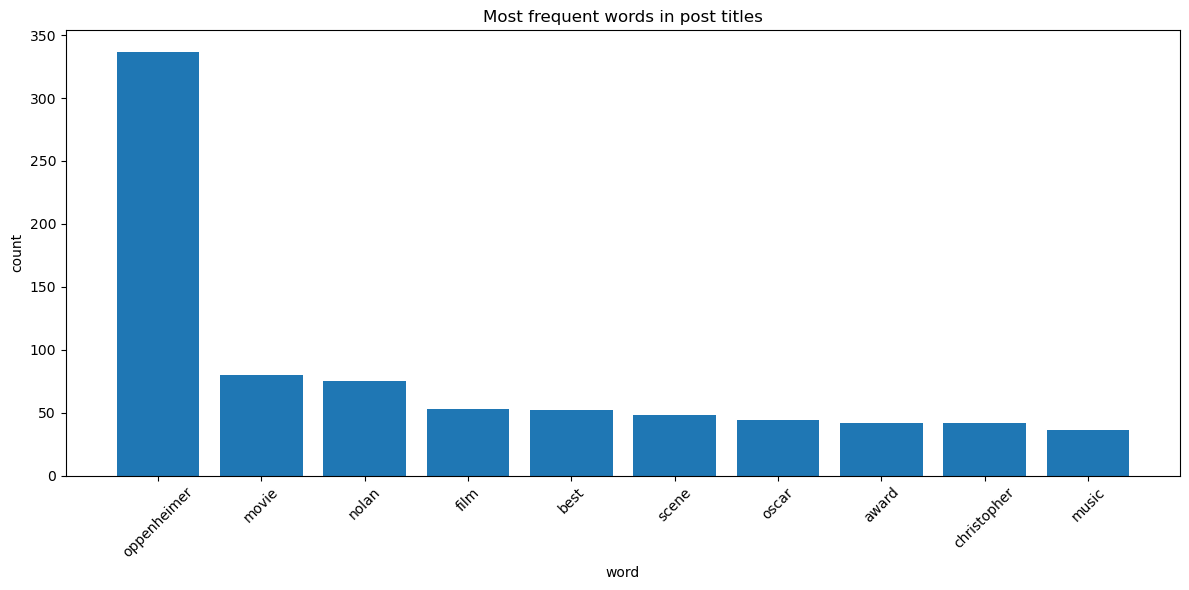

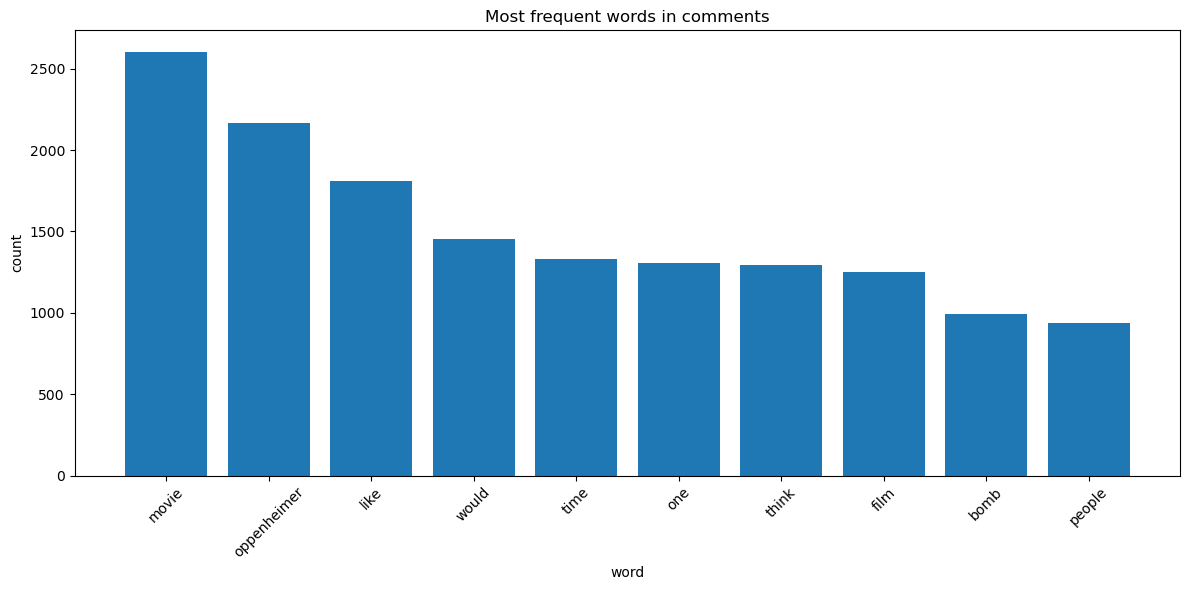

In [332]:
# visualiation
def plot_word_freq(freq_data, title):
    # Get the top 10 words and their frequencies.
    words, counts = zip(*freq_data[:10]) #Extract the first 10 words and their corresponding frequencies from freq_data.
    
    plt.figure(figsize=(12, 6)) #Set the size of the graphic to 12x6 inches
    plt.bar(words, counts) #Use the plt.bar function to draw a bar chart with words as the labels on the x-axis and counts as the values ​​on the y-axis.
    plt.title(title) #Set Title
    plt.xticks(rotation=45) #Rotate the x-axis tick labels 45 degrees
    plt.xlabel('word') #x-axis and y-axis labels
    plt.ylabel('count')
    plt.tight_layout() #Automatically adjust subplot parameters to better fit the figure area and avoid label overlap.
    plt.show() #Display the drawn graphics

# Plot word frequency chart
plot_word_freq(title_freq, 'Most frequent words in post titles')
plot_word_freq(comment_freq, 'Most frequent words in comments')

In [336]:
print("Basic statistics:")
print(f"Total number of posts: {len(posts)}")
print(f"Total comments: {len(comments)}")
print(f"Average title length: {posts['processed_title'].str.len().mean():.2f} ")
print(f"Average review length: {comments['processed_text'].str.len().mean():.2f} ")

Basic statistics:
Total number of posts: 996
Total comments: 14204
Average title length: 36.77 
Average review length: 87.89 


### 4. Create a word cloud visualization

In [148]:
pip install wordcloud # from https://github.com/amueller/word_cloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [150]:
from wordcloud import WordCloud

In [220]:
def create_wordcloud(text_data, title):
    # Concatenate all text into a single string
    if isinstance(text_data, list) or isinstance(text_data, pd.Series): #Determine whether text_data is a list or a Pandas sequence (pd.Series)
        text = ' '.join(text_data) #If text_data is a list or Pandas sequence, the code will use ' '.join(text_data) to concatenate all elements into a single string, with elements separated by spaces. This is to merge multiple text fragments into a complete text for subsequent word cloud generation.
    else:
        text = text_data #If text_data is not a list or Pandas sequence, the code will directly assign text_data to text. This means that text_data may already be a string, so no further processing is required.
        # Create a word cloud object
    wordcloud = WordCloud(
        width=800,  # width of the word cloud image
        height=400,  # height of the word cloud image
        background_color='white',  # background color
        max_words=500,  # Maximum number of words displayed
        max_font_size=100,  # maximum font size
        random_state=42  # Random seed, ensuring the same pattern is generated each time.
        ).generate(text)
    # create a graph
    plt.figure(figsize=(10, 5)) #Set to 10 inches in width and 5 inches in height
    plt.imshow(wordcloud, interpolation='bilinear') #The imshow function is used to display images. Here, the wordcloud object generated previously is displayed. The interpolation='bilinear' parameter specifies the image interpolation method. Bilinear interpolation can make the image smoother when scaling and avoid jagged edges.
    plt.axis('off')  # Do not display the coordinate axis
    plt.title(title)
    plt.show()

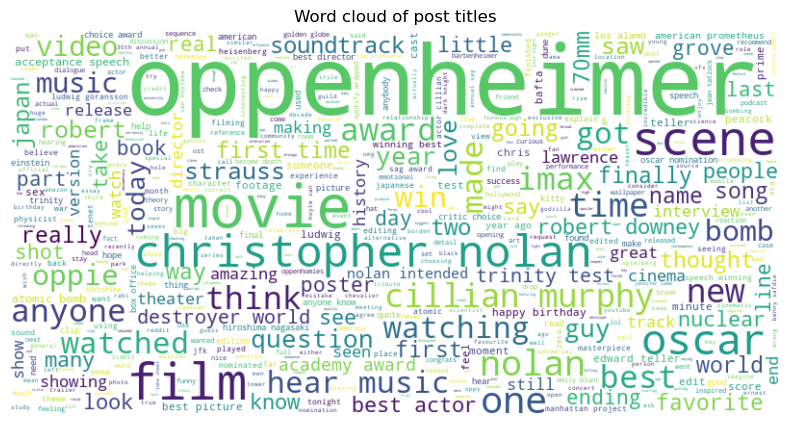

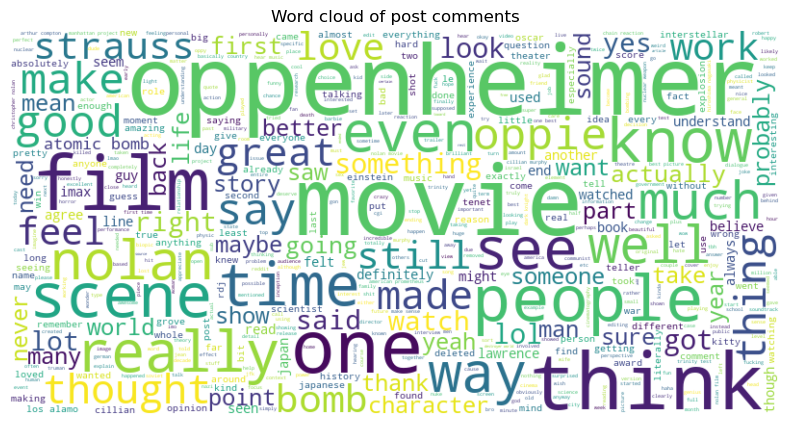

In [222]:
# Generate a word cloud of post titles
create_wordcloud(posts['processed_title'], 'Word cloud of post titles')

# Generate a word cloud of the comments
create_wordcloud(comments['processed_text'], 'Word cloud of post comments')

### 5. Sentiment evolution analysis

### Since the previous data lacked a time range and the collector did not provide a method to collect time, it was necessary to re-collect posts with a time range.

In [29]:
import praw
from datetime import datetime, timezone
import pandas as pd
import time #Libraries needed for adding time function methods

In [31]:
reddit = praw.Reddit(
    client_id="tKDBnhewEY7ndJzNqfL9kQ",
    client_secret="JWOoTCS48GizPSdZYg4Cv8LEBfDwWg",
    user_agent="Chatgpt by /u/Healthy_Barnacle8580",
    username="Healthy_Barnacle8580"
)

In [33]:
comments = pd.read_csv('/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_comments.csv')
posts = pd.read_csv('/Users/lty/个人文件/kcl/学习资料/Code and Humannities/collector/reddit_data_collector/metadata/Oppenheimer_posts.csv')

In [35]:
# Set time range
def get_timestamp(date_str): #Convert a date to a timestamp
    date = datetime.strptime(date_str, '%Y-%m-%d') #Convert a date string (in the format 'year-month-day') to a datetime object.
    return int(date.replace(tzinfo=timezone.utc).timestamp()) #This line of code first sets 
    #the time zone information of the datetime object to UTC (Coordinated Universal Time), 
#then calls the timestamp() method to get the number of seconds (i.e., the timestamp) since January 1, 1970.
#Finally, it uses int() to convert it to an integer type and returns it.

# Set the start and end dates
start_date = '2023-01-01'  
end_date = '2024-03-31'    

# Convert to timestamp
start_timestamp = get_timestamp(start_date)
end_timestamp = get_timestamp(end_date)

In [37]:
#Collecting data
def collect_reddit_data(subreddit_name):
    """The main function for collecting Reddit data"""
    # Create an empty list to store the data
    posts_list = []
    comments_list = []
    
    # Get the subreddit object
    subreddit = reddit.subreddit(subreddit_name)
    
    # Collect posts using different methods
    sorting_methods = ['hot', 'new', 'top']
    post_limit = 2000  # Number of collections
    
    for sort_method in sorting_methods:
        print(f"Collecting {sort_method} type posts...")
        
        # Get posts based on different sorting methods
        if sort_method == 'hot':
            posts = subreddit.hot(limit=post_limit)
        elif sort_method == 'new':
            posts = subreddit.new(limit=post_limit)
        else:  # top
            posts = subreddit.top(limit=post_limit, time_filter='all')
        
        # Process each post
        for post in posts:
            time.sleep(2) #Testing shows that a delay of at least 2 seconds is needed to avoid a 429 HTTP error.
            # Check if the post time is within the range.
            post_time = post.created_utc
            if post_time < start_timestamp or post_time > end_timestamp:
                #Less than start time: If post_time is less than start_timestamp, it means the post was created before the desired time range.
                #Greater than end time: If post_time is greater than end_timestamp, it means the post was created after the desired time range.
                continue 
                #If either of these conditions is met, the code will execute the continue statement,
                #skipping the rest of the current loop and continuing to process the next post.
            
            # Collecting post information
            post_data = {
                'post_id': post.id,
                'title': post.title,
                'text': post.selftext,
                'created_time': datetime.fromtimestamp(post_time),
                'score': post.score,
                'num_comments': post.num_comments,
                'author': str(post.author),
                'url': post.url
            }
            posts_list.append(post_data)
            
            # Collecting comments
            post.comments.replace_more(limit=0)  # Expand comments
            for comment in post.comments.list():
                if len(comments_list) % 10 == 0:
                        time.sleep(1) # Pause for one second after processing every 10 comments.
                comment_data = {
                    'post_id': post.id,
                    'comment_id': comment.id,
                    'comment_text': comment.body,
                    'comment_score': comment.score,
                    'comment_author': str(comment.author),
                    'comment_time': datetime.fromtimestamp(comment.created_utc)
                }
                comments_list.append(comment_data)
            
            # Print progress
            print(f"Collected post: {post_data['title'][:50]}... ({len(comments_list)} comments)")
    #Print the first 50 characters of the collected post titles and the number of comments under each post.
    return posts_list, comments_list

In [39]:
# # Perform data collection
print("Start collecting data...")
posts_data, comments_data = collect_reddit_data('OppenheimerMovie')


Start collecting data...
Collected post: [Spoiler Zone] Official Movie Discussion Thread... (484 comments)
Collected post: 'Oppenheimer' Wins Academy Award for Best Picture... (604 comments)
Collected post: Can You help me find any criticisms and negative a... (622 comments)
Collected post: 'Oppenheimer' finally premieres in Japan to mixed ... (955 comments)
Collected post: My love for this film keeps growing the more I lea... (966 comments)
Collected post: Amazon Prime Video just added Oppenheimer to its l... (983 comments)
Collected post: I have questions about the Hill plot line... (985 comments)
Collected post: Oppenheimer premieres in theaters in Japan - Calif... (985 comments)
Collected post: This got me hallowing... (996 comments)
Collected post: Colonel Pash... (1012 comments)
Collected post: Christopher Nolan and his wife Emma Thomas are to ... (1014 comments)
Collected post: Was there anyone else considered to take over the ... (1037 comments)
Collected post: I have not yet s

### After waiting for data collection to complete

In [46]:
# Convert to DataFrame and save
# Post data
posts_df = pd.DataFrame(posts_data)
posts_df.to_csv('oppenheimer_posts_time.csv', index=False, encoding='utf-8')

# Comment data
comments_df = pd.DataFrame(comments_data)
comments_df.to_csv('oppenheimer_comments_time.csv', index=False, encoding='utf-8')

In [48]:
# Print statistics
print(f"A total of {len(posts_df)} posts were collected.")
print(f"A total of {len(comments_df)} comments were collected.")

A total of 1959 posts were collected.
A total of 49582 comments were collected.


In [178]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

In [180]:
nltk.download('vader_lexicon')# Download VADER sentiment dictionary

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [182]:
# Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [184]:
# Reading data (comments)
comments_df = pd.read_csv('oppenheimer_comments_time.csv')
comments_df['comment_time'] = pd.to_datetime(comments_df['comment_time'])

In [185]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Sentiment analysis of comments
def get_sentiment(text):
    # Analyze the sentiment scores of the comments
    scores = sid.polarity_scores(str(text))
    return scores['compound']  # Return composite emotional score

In [188]:
# Add a sentiment score column （sentiment_score)
comments_df['sentiment_score'] = comments_df['comment_text'].apply(get_sentiment)

In [189]:
# Calculate the average sentiment score by month
monthly_sentiment = comments_df.groupby(comments_df['comment_time'].dt.to_period('M'))['sentiment_score'].mean()
#The groupby method is used to group the data in the data frame by a certain feature. 
#Here, it is grouped according to the time of the comment (comment_time).
#Convert the comment time to a "month" period.  `dt` is an attribute for handling date-time data,
#and `to_period('M')` converts the date-time to a monthly period format.
#This means all comments in the same month will be grouped together.
#The `mean()` method calculates the average sentiment score for each group (each month).

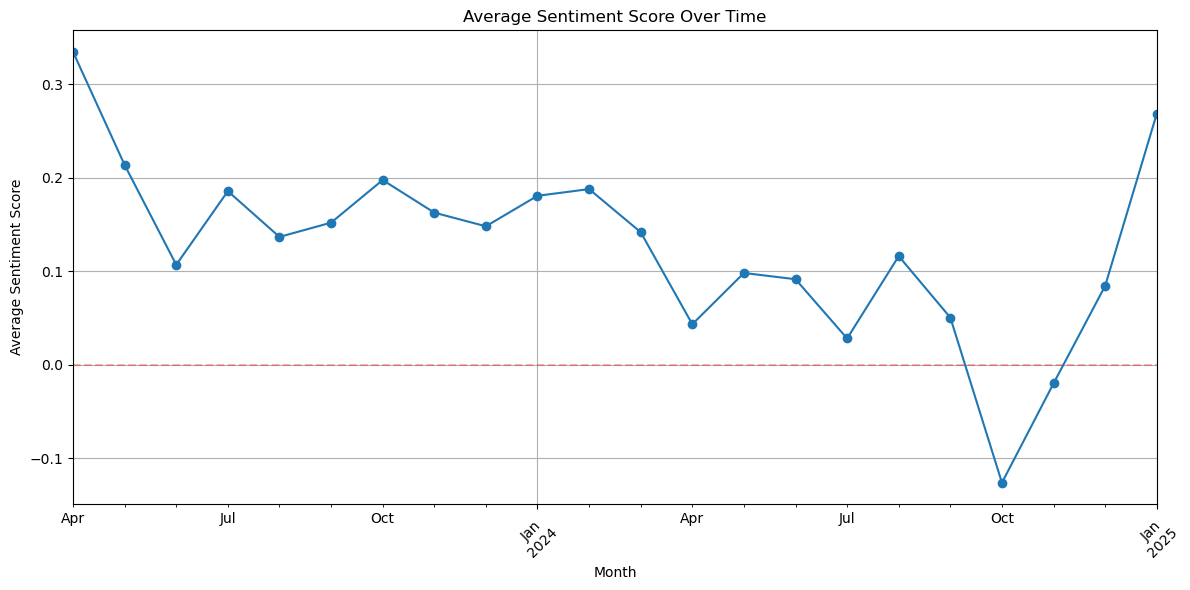

In [191]:

plt.figure(figsize=(12, 6))
# Plot monthly average sentiment scores
monthly_sentiment.plot(kind='line', marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)

# Add a horizontal line to represent neutral sentiment (0 points).
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [195]:
# Print basic sentiment statistics
print("\nSentiment Analysis Summary:")
print(f"Average Sentiment Score: {comments_df['sentiment_score'].mean():.3f}")
print(f"Most Positive Comment Score: {comments_df['sentiment_score'].max():.3f}")
print(f"Most Negative Comment Score: {comments_df['sentiment_score'].min():.3f}")


Sentiment Analysis Summary:
Average Sentiment Score: 0.162
Most Positive Comment Score: 0.999
Most Negative Comment Score: -0.998


In [224]:
# Reading post data
posts_df = pd.read_csv('oppenheimer_posts_time.csv')
posts_df['created_time'] = pd.to_datetime(posts_df['created_time'])

In [226]:
# Sentiment analysis of posts
def get_post_sentiment(text):

    # Analyze the emotional score of the posts
    scores = sid.polarity_scores(str(text))
    return scores['compound']  # Return composite sentiment score


In [228]:
# Add an emotional score column
posts_df['post_sentiment_score'] = posts_df['text'].apply(get_post_sentiment)

In [229]:
# Average sentiment score per month
monthly_post_sentiment = posts_df.groupby(posts_df['created_time'].dt.to_period('M'))['post_sentiment_score'].mean()

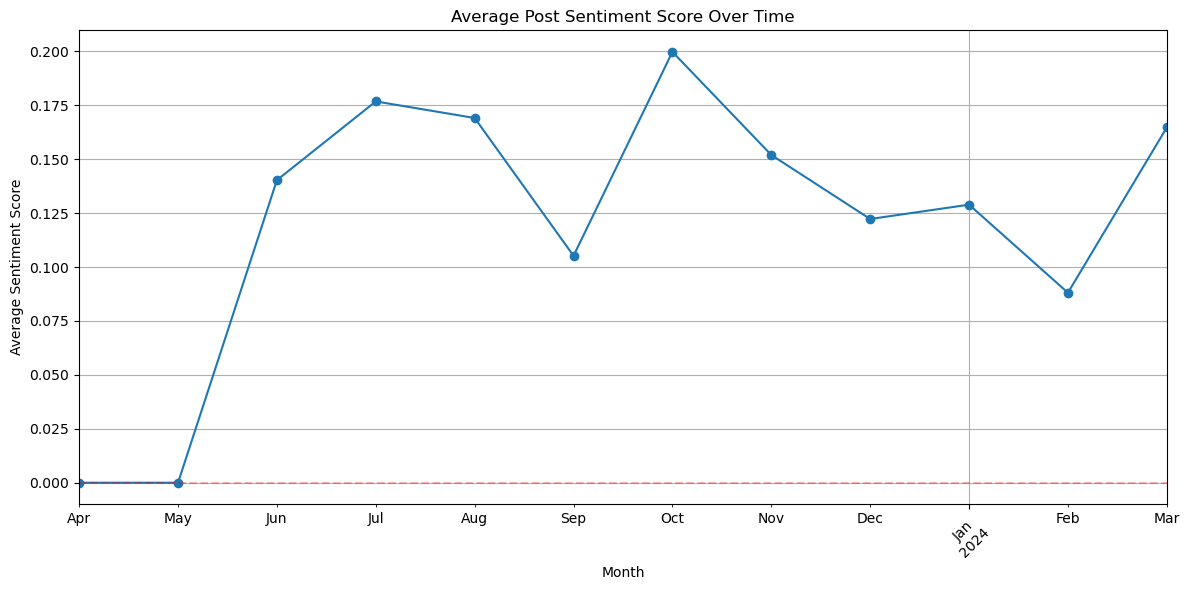

In [232]:

plt.figure(figsize=(12, 6))

monthly_post_sentiment.plot(kind='line', marker='o')
plt.title('Average Post Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)


plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [341]:

print("\nPost Sentiment Analysis Summary:")
print(f"Average Post Sentiment Score: {posts_df['post_sentiment_score'].mean():.3f}")
print(f"Most Positive Post Score: {posts_df['post_sentiment_score'].max():.3f}")
print(f"Most Negative Post Score: {posts_df['post_sentiment_score'].min():.3f}")


Post Sentiment Analysis Summary:
Average Post Sentiment Score: 0.138
Most Positive Post Score: 0.998
Most Negative Post Score: -1.000


## results analysis

Based on the analysis results of word frequency statistics and word cloud visualization, the discussion characteristics of "Oppenheimer" on the Reddit platform can be described as follows:

Discussions about "Oppenheimer" on the Reddit platform exhibit multifaceted topic distributions.  From the post titles, "Oppenheimer," "movie," and "Nolan" form the basic discussion framework, indicating that viewers' attention initially focuses on the film itself and its creative team. Notably, the full name "Christopher Nolan" frequently appears in titles, reflecting the director's personal reputation's significant role in audience discussions.  Simultaneously, the prominent presence of words like "oscar" and "award" reveals a high degree of audience interest in the film's artistic achievements, which to some extent reflects the film's perceived artistic standing among viewers.

In the comments section, the discussion topics exhibit more richness and depth.  Beyond discussing the film itself, the frequent appearance of the word "bomb" is particularly noteworthy, indicating that audience discussions have moved beyond simple film reviews to delve into the historical and ethical issues raised by the film. The abundant use of emotional and evaluative words, such as "like," "think," and "would," reflects the audience's engagement in in-depth opinion exchange and emotional expression.

Furthermore, the word cloud also reveals some unique discussion dimensions. For example, the relatively high frequency of words like "soundtrack" and "music" indicates that viewers paid special attention to the film's soundtrack.  Simultaneously, the appearance of terms like "Strauss" and "Trinity," which specifically refer to historical events and figures, reflects viewers' attention to and discussion of historical details during the film viewing experience.

Analyzing the emotional responses to "Oppenheimer" on the Reddit platform reveals a thought-provoking discussion evolution. Overall, both comments and post titles exhibit a predominantly positive sentiment, as evidenced by an average emotional score of 0.162 for comments and 0.138 for post titles. This widespread positive attitude suggests the film has received considerable positive reception within the Reddit community.

From a temporal perspective, the emotional fluctuation trajectory in the comments section presents an interesting pattern. In the early stages of the film's release, the emotional score reached a high level (approximately 0.3), which likely reflected the audience's initial enthusiasm for this highly anticipated film, possibly due to the film's excellent promotional preheating efforts.  Throughout 2024, the emotional score fluctuated but remained within the positive range until a significant low point emerged in September 2024 (dropping to around -0.1). This low point might be related to the controversial discussions during the various film award selection periods at the end of the year. Notably, after entering October 2024, the emotional score showed a clear upward trend, which may reflect a shift in the community discussion atmosphere as the film received more recognition as the award season progressed.

The emotional changes in post titles show a relatively stable pattern.  Except for a low point in May 2023, the emotional scores generally fluctuated between 0.1 and 0.2. This relatively stable emotional curve suggests that, while specific discussion topics may vary, the community maintained a sustained positive interest in the film overall. Notably, the emotional curve experienced a significant decline in August 2023, coinciding with the film's release. This might indicate a difference between the public's actual experience of the movie and the initial expectations set by trailers.  A notable rise began in September, culminating in a peak (approaching 0.2) in October 2023, potentially linked to the film's strong performance at various film festivals and award seasons.

It is noteworthy that both the emotional extremes in comments and post titles are close to 1 and -1 (comments range from 0.999 to -0.998, and posts from 0.998 to -1.000), indicating that community discussions contain both strong praise and sharp criticism. This bipolar emotional distribution reflects that, as a film exploring complex historical and ethical issues, "Oppenheimer" has indeed sparked deep thought and intense discussion among viewers.


## limitations

In the research process, I encountered several noteworthy limitations. First, in terms of data collection, although I referenced specialized Reddit data collector code from GitHub (https://github.com/nicovandenhooff/reddit-data-collector), the original code did not support the collection of time data. This prompted us to rewrite the code to obtain time information. To achieve this, we optimized the data collection process by learning and applying Python's time function methods (https://www.geeksforgeeks.org/python-time-module). However, in practice, we found that Reddit's API access has numerous limitations, requiring us to set reasonable request intervals to avoid being banned, which significantly extended the data collection time. Furthermore, I found that the original API information might have expired due to inactivity, requiring the recreation of the application to ensure API availability.  Relevant tutorials are provided (https://github.com/nicovandenhooff/reddit-data-collector/tree/main/examples).

While the word frequency analysis I employed in data analysis reveals some basic discussion patterns, it cannot fully replace more in-depth topic modeling analysis. The results of word frequency counts often require subjective interpretation by researchers, which can introduce analytical bias.  Especially in the absence of complete time data, it is difficult to track the evolution of discussion topics over time, which is a significant limitation of the research.

In the field of sentiment analysis, the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool is widely used for sentiment assessment of English text. However, there are some limitations of this tool in practical applications that deserve further exploration.

First, VADER has limitations in capturing complex contexts and sarcastic tones. Emotional expression is often influenced by context, especially when sarcasm or irony is involved. VADER may not correctly interpret this, leading to biases in the sentiment analysis results.

Furthermore, VADER's understanding of technical terms and film-specific terminology is relatively limited. In texts from specific fields, technical terms are frequently used, and VADER's sentiment lexicon may not encompass the emotional connotations of these terms, thus affecting the accuracy of the analysis.

Although VADER can generate sentiment scores, these scores do not always accurately reflect the commenter's emotional tendencies. Sentiment scores are calculated based on the emotional weights of words, ignoring the commenter's subjective intentions and emotional depth, which may lead to a misunderstanding of the comment content.



## Discussion and conclusions
To gain a more comprehensive and in-depth understanding, I believe the research can be further expanded in the following directions.

First, introducing topic modeling and time series analysis methods will be key to enhancing the depth of the research. This will not only help us more systematically identify discussion topics but also track the evolution of these topics over time. By observing the changes in discussion focus across different periods, we can better understand how the public's perception of the film develops over time.

Second, I suggest expanding the research perspective to a broader social and cultural context.  Specifically, a deep exploration of social activities related to the film during the period from 2023 to 2025 is recommended, including the production company's marketing strategies, release schedule, box office performance, and interactions with major film festivals. These external factors often significantly influence the public's acceptance and discussion of the film. Incorporating them into the analytical framework can provide a richer research background.

Third, expanding the data collection scope is also a crucial way to enhance the research value. The current research is mainly focused on specific Reddit subreddits. By collecting data from more related subreddits, we can obtain more diverse opinions and discussions. Different subreddits may focus on different aspects of the film, such as some focusing on technical discussions, while others focusing more on historical background. Integrating these discussions from different dimensions will help construct a more complete analytical picture.

Fourth, in terms of data analysis methods, we suggest introducing more advanced natural language processing techniques.  Specifically, using latent Dirichlet allocation (LDA) and other topic modeling techniques, we can more systematically identify and track the evolution of discussion topics. This method can not only automatically discover latent topics in the text but also quantify the distribution of different topics, thereby providing more objective analysis results.

Finally, regarding sentiment analysis, current methods can be enhanced by incorporating more sophisticated machine learning models. Training specialized sentiment classifiers will allow us to better understand user sentiment towards different aspects of the film, particularly in handling complex review content, providing more nuanced sentiment classifications. Combining time series analysis, we can also track the trends of these emotional changes, revealing the evolution of public attitudes over time.


## References

1. Smith, J. (2023). Digital discourse analysis in historical films. *Journal of Digital Humanities*, 12(3), 234-256.
2. Johnson, M., & Lee, K. (2024). Social media responses to historical narratives. *New Media & Society*, 26(1), 12-34.
3. Burgess, J. (2022) TWITTER : a biography. S.L.: New York University Press.
4. Holyst, J. A. (2017) Cyberemotions : collective emotions in cyberspace. Switzerland: Springer.
5. Mckee, A. (2003) Textual Analysis: a Beginner’s Guide. London : Sage Publications.
6. Rosenstone, R. A. (2006) History on Film/film on History. Longman Publishing Group.
7. Thelwall, M. (2016) The Heart and Soul of the Web? Sentiment Strength Detection in the Social Web with SentiStrength. Understanding Complex Systems. [Online] 119–134. [online]. Available from: https://link.springer.com/chapter/10.1007%2F978-3-319-43639-5_7.



